# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_Learning-USU/blob/main/Lectures%20and%20codes/Module%205-%20Deep%20Computer%20Vision/CNN_python/Module%205-%20CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 5- Deep Computer Vision- Convolutional Neural Networks (CNN)

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow https://www.tensorflow.org/install



In [1]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the data

In this notebook, we will be working with mnist data set: https://en.wikipedia.org/wiki/MNIST_database
* 60,000 train images
* 10,000 test images
* image size (28,28)

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
type(x_test)

numpy.ndarray

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

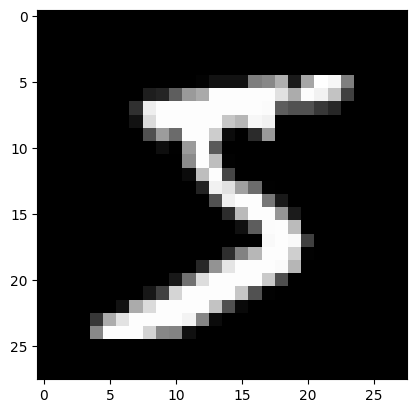

In [8]:
plt.imshow(x_train[0], cmap='gray')  # Display the array as a grayscale image
plt.show()  # Display the figure

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Convolutional Neural Networks (CNN)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
# reshaping
x_train.shape

(60000, 28, 28)

In [12]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test.shape

(10000, 28, 28, 1)

## Creating a CNN model:


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy', # Multi-class classification (orders, no one-hot encoding)
                  metrics=['accuracy'])

    return model

In [33]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flattening_layer (Flatten)      │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# params
1*(3*3)*32 + 32

320

In [35]:
32*(3*3)*64+64

18496

In [36]:
64*(3*3)*128+128

73856

In [37]:
3*3*128

1152

In [38]:
1152*64+64

73792

In [39]:
64*10+10

650

output shape:
* channels are the number of filters
* output size = $floor(\frac{n_{input} + 2p - f}{s} + 1)$
* each pooling will half the width and height

In [40]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32)
np.floor(((28+0-3)/1)+1)

26.0

## Model fit


In [41]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="first_CNN.keras",save_best_only=True, monitor="val_loss")


In [42]:
history = model.fit(x=x_train, y=y_train,
          validation_data=(x_test, y_test),
          epochs=10, batch_size=64, callbacks=[modelcheckpoint])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8756 - loss: 0.3984 - val_accuracy: 0.9853 - val_loss: 0.0463
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0437 - val_accuracy: 0.9880 - val_loss: 0.0375
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0315 - val_accuracy: 0.9918 - val_loss: 0.0265
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9904 - val_loss: 0.0304
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9954 - loss: 0.0155 - val_accuracy: 0.9923 - val_loss: 0.0304
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9965 - loss: 0.0121 - val_accuracy: 0.9922 - val_loss: 0.0298
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9915 - val_loss: 0.0400
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.

In [43]:
60000/64

937.5

In [44]:
test_model = keras.models.load_model("first_CNN.keras")
test_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0341


[0.026484372094273567, 0.9918000102043152]

As you can see, this simple CNN performs really well in the test set with +99% accuracy.

## Model evaluation

In [45]:
model.metrics_names

['loss', 'compile_metrics']

In [46]:
metrics = pd.DataFrame(history.history)

In [47]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.947867,0.169300,0.9853,0.046250
1,0.986800,0.043321,0.9880,0.037484
2,0.990650,0.030688,0.9918,0.026484
3,0.992800,0.022903,0.9904,0.030410
4,0.994767,0.017295,0.9923,0.030431


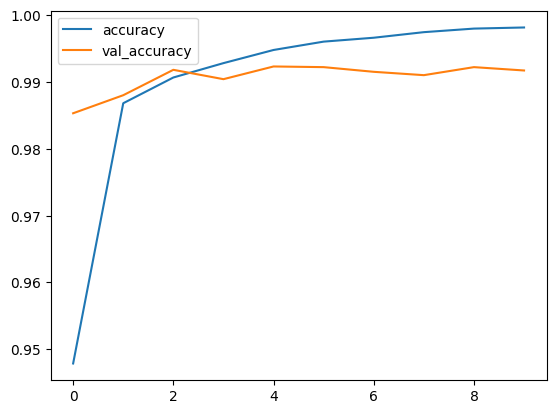

In [48]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

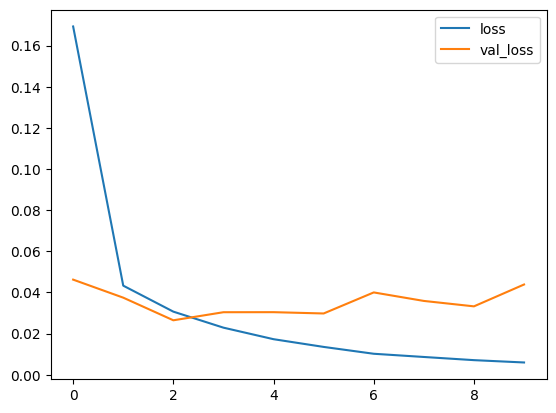

In [49]:
metrics[['loss','val_loss']].plot()
plt.show()

In [50]:
predictions_prob = model.predict(x_test)
predictions_prob[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.8022983e-15, 1.4622091e-10, 2.7200757e-12, 1.2954436e-09,
       6.3196015e-12, 1.7919050e-14, 5.4635522e-19, 1.0000000e+00,
       1.3369088e-14, 2.7821660e-11], dtype=float32)

In [51]:
predictions_prob.shape

(10000, 10)

In [52]:
y_test[0]

7

let's generate prediction classes:
* For binary classification, np.where(y_pred > threshold, 1,0)
* For multiclass classification, np.argmax(predictions, axis=1)




In [53]:
predictions = np.argmax(predictions_prob, axis=1)
predictions[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
confusion_matrix(y_test,predictions)

array([[ 976,    1,    0,    0,    0,    0,    0,    2,    1,    0],
       [   0, 1132,    1,    1,    0,    0,    0,    1,    0,    0],
       [   1,    0, 1024,    0,    0,    0,    0,    6,    1,    0],
       [   0,    0,    1, 1005,    0,    4,    0,    0,    0,    0],
       [   0,    0,    1,    0,  975,    0,    1,    0,    0,    5],
       [   0,    0,    0,    2,    0,  889,    1,    0,    0,    0],
       [   2,    3,    0,    0,    1,   11,  940,    0,    1,    0],
       [   0,    2,    3,    0,    0,    0,    0, 1019,    1,    3],
       [   1,    0,    2,    3,    0,    2,    0,    2,  960,    4],
       [   1,    0,    0,    0,    4,    5,    0,    1,    1,  997]],
      dtype=int64)

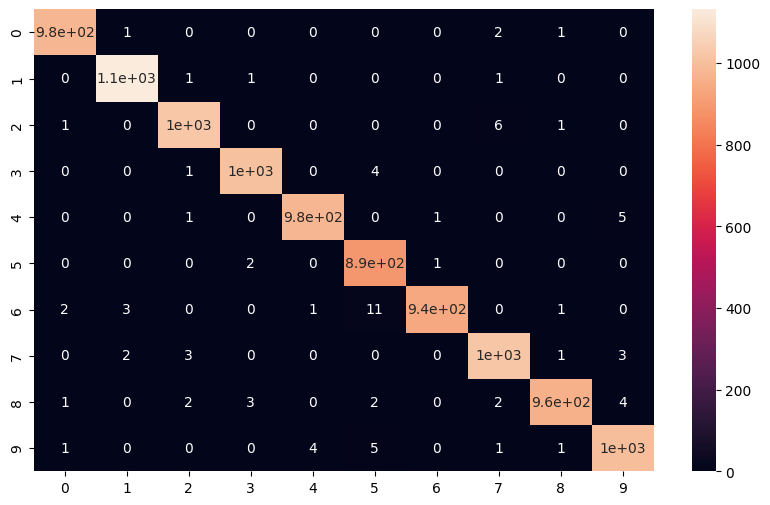

In [57]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

Let's look into some of the misclassified images!

In [58]:
y_test!=predictions

array([False, False, False, ..., False, False, False])

In [59]:
misclassified_images = [i for i, x in enumerate(y_test!=predictions) if x==True]
misclassified_images[:9]

[62, 247, 340, 449, 583, 659, 938, 947, 1014]

In [60]:
for a, b in enumerate(misclassified_images[:9]):
  print (a, b)

0 62
1 247
2 340
3 449
4 583
5 659
6 938
7 947
8 1014


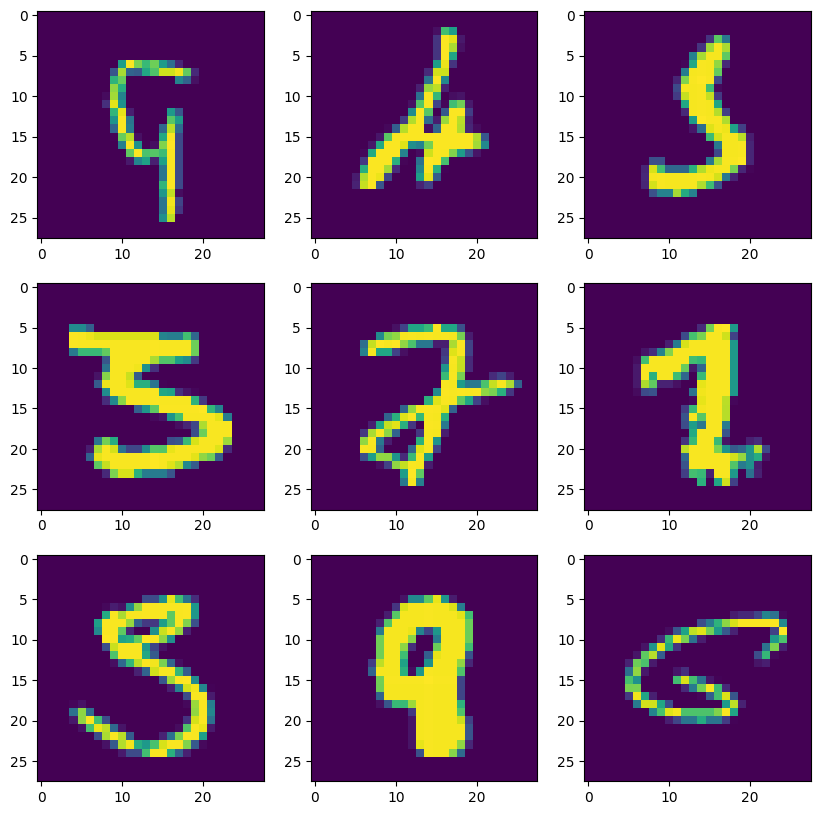

In [61]:
plt.figure(figsize=(10,10))

actuals = []
for i , number in enumerate(misclassified_images[:9]):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[number].reshape(28,28))
  actuals.append(y_test[number])
plt.show()

In [62]:
actuals

[9, 4, 5, 3, 2, 2, 3, 8, 6]

In [63]:
predictions[misclassified_images[:9]]

array([5, 2, 3, 5, 7, 7, 5, 9, 5], dtype=int64)

# Done